# Digit Recognizer

## Ziel: Alle Basics in einem Projekt

Unser Projekt heute ist ein Digit Recognizer. Warum? Das MNIST ("Modified National Institute of Standards and Technology") kann als "hello world!" Datensatz von Computer Vision betrachtet werden. 

Euer Ziel ist es, Ziffern aus einem Datensatz von zehntausenden handgeschriebenen Bildern korrekt zu erkennen. Es gibt eine Reihe von Tutorials, die alles von Regression bis zu neuronalen Netzen abdecken. 

Lasst uns beginnen:

# 1. Schritt: Daten importieren

Habt ihr bereits eine Umgebung erstellt?

Befehle nacheinander im Terminal eingeben

- conda create --name PythonInSports python=3.11

- conda activate PythonInSports

- conda install ipykernel

Wir wollen als erstes unsere .csv Datei einlesen und hierfür benötigen wir die pandas Bibliothek. Pandas ist eine Python-Bibliothek zur Datenanalyse und -manipulation.

Das heißt: 
1) Pandas installieren
2) Pandas importieren
3) Datensatz einlesen

Macht euch gerne kurz Gedanken. Lösung folgt. 

In [75]:
#conda install pandas ins Terminal eingeben um pandas zu installieren
import pandas as pd #importiere pandas und nenne es pd. Das ist Standard in der Python Community

### Fix the mistakes

In [ ]:
df_sample = pd.read_csv(sample_submission.csv)
df_test = pd.read_json(test.csv)
df_train = pd.read_csv('train')

## Hinweis

Ihr stoßt mal auf einen Datensatz der keine .csv Datei ist? Hier ein paar gängige Beispiele:

1) data = pd.read_json("daten.json")
2) data = pd.read_excel("daten.xlsx", sheet_name="Tabelle1")
3) data = pd.read_pickle("daten.pkl")

### Was ist .json?
JSON (JavaScript Object Notation) ist ein leichtgewichtiges, textbasiertes Datenformat, das häufig für den Datenaustausch zwischen Anwendungen verwendet wird. Es ist einfach zu lesen, strukturiert und wird oft in Web-APIs, Datenbanken und Konfigurationsdateien genutzt.

### Was sind Pickle-Dateien?
Pickle ist ein binäres Dateiformat, das in Python genutzt wird, um Objekte zu speichern und später wiederzuladen. In Pandas wird es oft verwendet, um DataFrames schnell und speichereffizient zu sichern.

# 2. Schritt: Mit den Daten vertraut werden. 

Einer eurer ersten Schritte sollte es immmer sein, sich einmal intensiv mit dem Datensatz vertraut zu machen. 

In [2]:
df_train.head() #zeigt die ersten 5 Zeilen des Datensatzes an

# Ihr wollt mehr sehen?

NameError: name 'df_train' is not defined

In [78]:
df_train.head(10)  # Zeigt die ersten 10 Zeilen des Datensatzes an

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_train.tail() #zeigt die letzten 5 Zeilen des Datensatzes an
df_train.tail(10) #zeigt die letzten 10 Zeilen des Datensatzes an

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41990,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
'''
Zeigt:

Anzahl der Zeilen und Spalten
Datentypen jeder Spalte
Anzahl der nicht-null Werte pro Spalte (nützlich für fehlende Werte!)
'''

df_train.info() #zeigt Informationen über den Datensatz an

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [81]:
'''
Gibt eine statistische Zusammenfassung der numerischen Spalten:

Mittelwert (mean)
Standardabweichung (std)
Minimum (min)
Maximum (max)
Quartile (25%, 50%, 75%)
'''

df_train.describe() #zeigt statistische Informationen über den Datensatz an

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [82]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [83]:
df_train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [84]:
df_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [85]:
# Falls du wissen willst, welche einzigartigen Werte eine Spalte hat, kannst du die Methode unique() verwenden:
df_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [86]:
df_train['pixel0'].unique()

array([0])

In [87]:
# Zeigt, wie viele verschiedene Werte eine Spalte hat:
df_train['label'].nunique()

10

In [88]:
df_train['pixel0'].nunique()

1

In [89]:
#Zeigt, wie oft jeder Wert in einer Spalte vorkommt:
df_train['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [90]:
df_train['pixel0'].value_counts()

pixel0
0    42000
Name: count, dtype: int64

In [91]:
# Der shape-Aufruf in Pandas gibt die Anzahl der Zeilen und Spalten eines DataFrames zurück.
df_train.shape

(42000, 785)

In [92]:
df_train.shape[0]  # Gibt die Anzahl der Zeilen zurück

42000

In [93]:
df_train.shape[1]  # Gibt die Anzahl der Spalten zurück

785

## Visualisierung

### Matplotlib.pyplot:
matplotlib.pyplot ist ein Modul von Matplotlib, das eine einfache Schnittstelle für das Erstellen von Diagrammen und Plots bietet.

- plt.plot(x, y): Erstellt eine 2D-Linie von x- zu y-Werten
- plt.scatter(x, y): Erstellt ein Streudiagramm
- plt.bar(x, height): Erstellt ein Balkendiagramm
- plt.hist(data, bins=n): Erstellt ein Histogramm mit n Bins
- plt.imshow(image, cmap='gray'): Zeigt ein Bild als 2D-Array an
- plt.xlabel('X-Achse'): Beschriftet die X-Achse
- plt.ylabel('Y-Achse'): Beschriftet die Y-Achse
- plt.title('Titel'): Setzt einen Titel für den Plot
- plt.show(): Zeigt den Plot an

### numpy
numpy (Numerical Python) ist eine leistungsstarke Bibliothek für numerische Berechnungen in Python. Sie bietet schnelle, effiziente Arrays und viele mathematische Funktionen.

- np.array([1, 2, 3]): Erstellt ein NumPy-Array
- np.zeros((3,3)): Erstellt eine 3×3-Matrix mit Nullen
- np.ones((2,2)): Erstellt eine 2×2-Matrix mit Einsen
- np.arange(0, 10, 2): Erstellt ein Array von 0 bis 10 in 2er-Schritten
- np.linspace(0, 1, 5): Erstellt 5 gleichmäßig verteilte Werte zwischen 0 und 1
- np.reshape(arr, (3,3)): Formt ein Array in eine 3×3-Matrix um
- np.random.rand(3,3): Erstellt eine 3×3-Matrix mit Zufallszahlen (0 bis 1)
- np.mean(arr): Berechnet den Mittelwert des Arrays
- np.std(arr): Berechnet die Standardabweichung
- np.dot(A, B): Matrixmultiplikation von A und B

In [94]:
import matplotlib.pyplot as plt
import numpy as np

image = df_train.iloc[1][1:].to_numpy().reshape(28, 28)
image_label = df_train.iloc[10][0]

/var/folders/5t/cq7cgcls7ds39zjljh3115l80000gn/T/ipykernel_57168/2811604706.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_label = df_train.iloc[10][0]


df_train.iloc[10][1:] 
- Dies greift auf die 10. Zeile (iloc[10]) von df_train zu.
- [1:] bedeutet, dass die erste Spalte ausgeschlossen wird, d.h., es werden nur die Feature-Werte (Pixelwerte des Bildes) entnommen.

.to_numpy().reshape(28, 28)

- Die Werte werden mit .to_numpy() in ein NumPy-Array umgewandelt.
- reshape(28, 28) formt das eindimensionale Array in eine 28×28-Matrix, was typisch für Bilder aus dem MNIST-Datensatz ist.

image_label = df_train.iloc[10][0]

- Hier wird der Wert der ersten Spalte der 10. Zeile extrahiert, was in vielen Datensätzen das Label des Bildes ist (die Ziffer im MNIST-Datensatz).

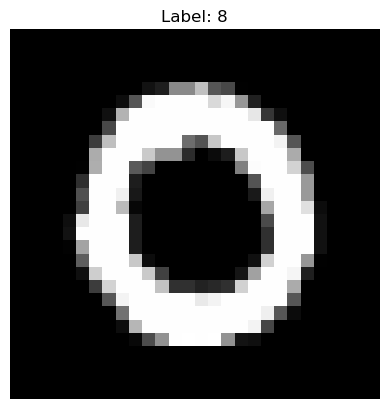

In [ ]:
plt.imshow(image, cmap='')
plt.title(f"Label: {image_label}")
plt.axis('off')
plt.show()

plt.imshow(image, cmap='gray')

- imshow() zeigt das Bild image als 2D-Array an.
- cmap='gray' sorgt dafür, dass das Bild in Graustufen angezeigt wird, anstatt in einer Standard-Farbskala.

plt.title(f"Label: {image_label}")
- Setzt den Titel des Plots auf "Label: {image_label}".
- {image_label} wird durch den tatsächlichen Wert ersetzt, z. B. "Label: 7" für eine Ziffer 7.

plt.axis('off')
- Entfernt die Achsenbeschriftungen und Gitterlinien.
- Das macht das Bild klarer und sorgt dafür, dass nur das eigentliche Bild ohne Koordinaten sichtbar ist.

plt.show()
- Zeigt das Bild auf dem Bildschirm an.

### Wie werden aus Zahlenwerten nun Farben?

Die Umwandlung von Zahlenwerten in Farben in matplotlib.pyplot.imshow() erfolgt über eine Colormap (Farbschema, cmap). Dabei werden die Zahlenwerte im übergebenen Array (image) in Farben umgerechnet.

- Das übergebene image ist ein NumPy-Array mit numerischen Pixelwerten.
- Je nach Datentyp und Wertebereich wird imshow() die Werte auf eine Farbskala (Colormap) umlegen.
- Die Farbzuordnung hängt vom gewählten cmap ab (z. B. gray, viridis, hot).

Probiert einmal viridis und hot oben aus!

Falls image Werte von 0 bis 255 hat, dann bedeutet 0 Schwarz und 255 Weiß. (128 Grauton)
Falls image Werte von 0 bis 1 hat, wird 0 Schwarz und 1 Weiß gesetzt.

## Ok, wissen wir genügend über den Datensatz um jetzt schon ein Neurales Netz aufzusetzen? Was wissen wir denn bisher?

- Bilder: 70.000 handgeschriebene Ziffern als 28×28 Graustufenbilder (kein RGB).
- Trainingsset: 60.000 Bilder.
- Testset: 10.000 Bilder.
- Label: Jede Ziffer (0–9) hat eine zugehörige Klassenzahl (z. B. Label = 7 für eine handgeschriebene „7“).

- Jeder Datensatz besteht aus einer Liste von Pixelwerten (0–255) in einer flachen Vektordarstellung.
- 0 = Schwarz, 255 = Weiß → Werte dazwischen sind Graustufen.
- Die Bilder können als 2D-Array (28×28) oder als 1D-Vektor (784 Features) genutzt werden.
- Die Pixelwerte können als NumPy-Array gespeichert werden.

### sklearn
scikit-learn ist eine der wichtigsten Bibliotheken für maschinelles Lernen in Python. Sie bietet:

- Klassifikations- und Regressionsmodelle (z. B. SVMs, Entscheidungsbäume, kNN).
- Datenvorverarbeitung (z. B. Skalierung, One-Hot-Encoding).
- Modellbewertung (z. B. Kreuzvalidierung, Metriken wie Accuracy, F1-Score).
- Feature-Engineering & Selektion (z. B. PCA, Feature Importance).

train_test_split gehört zu sklearn.model_selection und wird verwendet, um Daten in Trainings- und Testsets aufzuteilen.

Der One-Hot-Encoder wird verwendet, um kategorische Daten (z. B. Labels oder Textkategorien) in eine numerische Binärdarstellung umzuwandeln. Dies ist besonders nützlich für maschinelles Lernen, da viele Algorithmen nicht direkt mit Kategorien umgehen können.

In [96]:
# conda install scikit-learn
# Hier müsst ihr ggf. das Kernel neu starten, damit die Installation wirksam wird
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [97]:
X = df_train.iloc[:, 1:].values.astype(np.float32) / 255.0

'''
df.iloc[:, 1:]:
Wählt alle Spalten außer der ersten → enthält nur die Pixelwerte (Features).
.values: Wandelt das Pandas-DataFrame in ein NumPy-Array um.
.astype(np.float32): Konvertiert die Werte in 32-Bit Gleitkommazahlen (float32) für effizientere Berechnungen.
/ 255.0: Normalisiert die Werte auf den Bereich [0,1] (da Pixelwerte ursprünglich 0-255 sind).
'''

'\ndf.iloc[:, 1:]:\nWählt alle Spalten außer der ersten → enthält nur die Pixelwerte (Features).\n.values: Wandelt das Pandas-DataFrame in ein NumPy-Array um.\n.astype(np.float32): Konvertiert die Werte in 32-Bit Gleitkommazahlen (float32) für effizientere Berechnungen.\n/ 255.0: Normalisiert die Werte auf den Bereich [0,1] (da Pixelwerte ursprünglich 0-255 sind).\n'

In [98]:
y = df_train.iloc[:, 0].values.astype(np.int64)

'''
Was passiert hier?

df.iloc[:, 0]: Wählt die erste Spalte → enthält die Labels (Ziffern 0-9).
.values: Wandelt die Pandas-Serie in ein NumPy-Array um.
.astype(np.int64): Konvertiert die Labels in 64-Bit Ganzzahlen (int64).
'''

'\nWas passiert hier?\n\ndf.iloc[:, 0]: Wählt die erste Spalte → enthält die Labels (Ziffern 0-9).\n.values: Wandelt die Pandas-Serie in ein NumPy-Array um.\n.astype(np.int64): Konvertiert die Labels in 64-Bit Ganzzahlen (int64).\n'

### One Hot Encoding

Warum?

One-Hot-Encoding wird genutzt, um **kategorische Variablen** in numerische Form umzuwandeln, sodass ML-Modelle sie verarbeiten können. Es verhindert eine falsche Ordnung und ist essenziell für neuronale Netze.

Beispiel:

| Obst   | One-Hot-Encoding |
|--------|-----------------|
| Apfel  | **1  0  0** |
| Banane | **0  1  0** |
| Kirsche | **0  0  1** |


Dummy-Encoding ist ähnlich, aber reduziert die Anzahl der Spalten um 1, um Multikollinearität zu vermeiden.

Hier wird eine Kategorie als Referenz weggelassen.

Nützlich für lineare Modelle, da eine volle One-Hot-Codierung zu redundanten Informationen führen kann.

One-Hot-Encoding → für neuronale Netze & Entscheidungsbäume
Dummy-Encoding → für lineare Regression oder Modelle mit Multikollinearitätsproblemen

In [ ]:
# Encoder = ...?
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

'''
sparse_output = False sorgt dafür, dass die Ausgabe ein NumPy-Array ist (statt einer scipy.sparse-Matrix).

y wird in eine 2D-Form umgewandelt ((n_samples, 1)), da OneHotEncoder eine Matrix erwartet.

- fit() lernt die Kategorien (z. B. 0-9 für MNIST).

- transform() wandelt sie in One-Hot-Vektoren um.
'''

'\nsparse_output = False sorgt dafür, dass die Ausgabe ein NumPy-Array ist (statt einer scipy.sparse-Matrix).\n\ny wird in eine 2D-Form umgewandelt ((n_samples, 1)), da OneHotEncoder eine Matrix erwartet.\n\n- fit() lernt die Kategorien (z. B. 0-9 für MNIST).\n\n- transform() wandelt sie in One-Hot-Vektoren um.\n'

In [ ]:
# Splitte die Daten in Training und Test

'''
Training und Test:
test_size=0.2: 20% der Daten werden als Testset verwendet.
random_state=42: Zufällige, aber reproduzierbare Aufteilung.

Training und Validierung:
X_train, y_train aus dem vorherigen Schritt werden nochmals aufgeteilt.
test_size=0.2: 20% des ursprünglichen Trainingssets werden als Validierungsset genutzt.
'''

'\nTraining und Test:\ntest_size=0.2: 20% der Daten werden als Testset verwendet.\nrandom_state=42: Zufällige, aber reproduzierbare Aufteilung.\n\nTraining und Validierung:\nX_train, y_train aus dem vorherigen Schritt werden nochmals aufgeteilt.\ntest_size=0.2: 20% des ursprünglichen Trainingssets werden als Validierungsset genutzt.\n'

Trainingsset (X_train, y_train) → Modell trainieren.

Validierungsset (X_val, y_val) → Modelloptimierung (z. B. Hyperparameter-Tuning).

Testset (X_test, y_test) → Finale Bewertung nach Training.

## Neurales Netzwerk

In [ ]:
input_size = ???
hidden_size_1 = 128
hidden_size_2 = 64
output_size = ???

alpha = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

np.random.seed(42)
W1 = np.random.randn(, ???) * np.sqrt(2.0 / ???)
b1 = np.zeros((1, ???))
W2 = np.random.randn(, ???) * np.sqrt(2.0 / ???)
b2 = np.zeros((1, ???))
W3 = np.random.randn(???, ???) * np.sqrt(2.0 / ???)
b3 = np.zeros((1, ???))

moving_avg_W1, moving_var_W1 = np.zeros_like(?), np.zeros_like(?)
moving_avg_b1, moving_var_b1 = np.zeros_like(?), np.zeros_like(?)
moving_avg_W2, moving_var_W2 = np.zeros_like(?), np.zeros_like(?)
moving_avg_b2, moving_var_b2 = np.zeros_like(?), np.zeros_like(?)
moving_avg_W3, moving_var_W3 = np.zeros_like(?), np.zeros_like(?)
moving_avg_b3, moving_var_b3 = np.zeros_like(?), np.zeros_like(?)


### Was bedeutet dieser Code

- input_size = 784: Jede Eingabe ist ein MNIST-Bild mit 28×28=784 Pixeln, also ein Vektor mit 784 Werten.
- hidden_size1 = 128: Erste versteckte Schicht hat 128 Neuronen.
- hidden_size2 = 64: Zweite versteckte Schicht hat 64 Neuronen.
- output_size = 10: Das Netz gibt 10 Klassen für Ziffern (0-9) aus.

- alpha (Lernrate): 0.001 bestimmt, wie stark die Gewichte pro Schritt angepasst werden.
- beta1 & beta2: Adam-Parameter zur Berechnung von Momenten (moving averages):
- beta1 = 0.9: Exponentielle Gewichtung der ersten Momentenschätzung (Gradientenmittelwert).
- beta2 = 0.999: Exponentielle Gewichtung der zweiten Momentenschätzung (Gradientenvarianz).
- epsilon = 1e-8: Kleiner Wert, um Division durch Null zu verhindern.

- np.random.seed(42): Stellt sicher, dass Zufallszahlen bei jedem Lauf gleich bleiben (Reproduzierbarkeit).
- Gewichtsmatrizen W1, W2, W3:
  - np.random.randn(...) → Erstellt eine Normalverteilung (Gauß-Verteilung) von Zufallszahlen.
  - * np.sqrt(2.0 / n) → Xavier/He-Initialisierung, um den Gradientenfluss zu verbessern:
    - np.sqrt(2.0 / input_size): Skalierungsfaktor für stabilere Gradienten während des Trainings.
- Bias-Werte b1, b2, b3:
- Setzen auf 0, da Bias keine zufälligen Werte benötigt.

Warum He-Initialisierung? Verhindert, dass Aktivierungswerte zu groß oder zu klein werden (Problem des verschwindenden oder explodierenden Gradienten).

- moving_avg_Wi → Exponentiell gewichtetes Mittel (m_t in Adam) → Schätzt den Durchschnitt des Gradienten.
- moving_var_Wi → Exponentiell gewichtete Varianz (v_t in Adam) → Schätzt die Streuung des Gradienten.
- Beide werden anfangs auf 0 gesetzt.


In [ ]:
# ReLu
def relu(Z):
    return np.maximum(?, Z)

# Softmax
def softmax(Z):
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

# Compute Loss
def compute_loss(Y, Y_hat):
    return -np.mean(Y * np.log(Y_hat + epsilon))

In [ ]:
def forward_propagation(X):
  Z1 = np.dot(X, W1) + ?
  A1 = relu(Z1)

  Z2 = np.dot(A1, ?) + b2
  A2 = relu(Z2)

  Z3 = np.dot(?, W3) + b3
  A3 = softmax(Z3)

  return Z1, A1, Z2, A2, Z3, A3

In [ ]:
def backward_propagation(X, Y, Z1, A1, Z2, A2, Z3, A3):
  m = X.shape[0]

  dZ3 = A3 - Y
  dW3 = np.dot(A2.T, dZ3) / m
  db3 = np.sum(dZ3, axis=0, keepdims=True) / m

  dA2 = np.dot(dZ3, W3.T)
  dZ2 = dA2 * (Z2 > 0)
  dW2 = np.dot(A1.T, dZ2) / m
  db2 = np.sum(dZ2, axis=0, keepdims=True) / m

  dA1 = np.dot(dZ2, W2.T)
  dZ1 = dA1 * (Z1 > 0)
  dW1 = np.dot(X.T, dZ1) / m
  db1 = np.sum(dZ1, axis=0, keepdims=True) / m

  return dW1, db1, dW2, db2, dW3, db3

In [105]:
def adam_update(time_step, weight_gradient, bias_gradient, moving_avg_weight, moving_var_weight, moving_avg_bias, moving_var_bias):
  moving_avg_weight = beta1 * moving_avg_weight + (1 - beta1) * weight_gradient
  moving_var_weight = beta2 * moving_var_weight + (1 - beta2) * (weight_gradient ** 2)

  moving_avg_bias = beta1 * moving_avg_bias + (1 - beta1) * bias_gradient
  moving_var_bias = beta2 * moving_var_bias + (1 - beta2) * (bias_gradient ** 2)

  corrected_moving_avg_weight = moving_avg_weight / (1 - beta1 ** time_step)
  corrected_moving_var_weight = moving_var_weight / (1 - beta2 ** time_step)

  corrected_moving_avg_bias = moving_avg_bias / (1 - beta1 ** time_step)
  corrected_moving_var_bias = moving_var_bias / (1 - beta2 ** time_step)

  weight_update = alpha * corrected_moving_avg_weight / (np.sqrt(corrected_moving_var_weight) + epsilon)
  bias_update = alpha * corrected_moving_avg_bias / (np.sqrt(corrected_moving_var_bias) + epsilon)

  return weight_update, bias_update, moving_avg_weight, moving_var_weight, moving_avg_bias, moving_var_bias

In [ ]:
epochs = 10
batch_size = 32

# Setze die Schleife: For? Do-While? While?
  for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]

    Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X_batch)

    dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X_batch, y_batch, Z1, A1, Z2, A2, Z3, A3)

    W1_update, b1_update, moving_avg_W1, moving_var_W1, moving_avg_b1, moving_var_b1 = adam_update(epoch + 1, dW1, db1, moving_avg_W1, moving_var_W1, moving_avg_b1, moving_var_b1)

    W2_update, b2_update, moving_avg_W2, moving_var_W2, moving_avg_b2, moving_var_b2 = adam_update(epoch + 1, dW2, db2, moving_avg_W2, moving_var_W2, moving_avg_b2, moving_var_b2)

    W3_update, b3_update, moving_avg_W3, moving_var_W3, moving_avg_b3, moving_var_b3 = adam_update(epoch + 1, dW3, db3, moving_avg_W3, moving_var_W3, moving_avg_b3, moving_var_b3)

    ? -= W1_update
    ? -= b1_update
    ? -= W2_update
    ? -= b2_update
    ? -= W3_update
    ? -= b3_update

  _, _, _, _, _, A3 = forward_propagation(X_train)
  loss = compute_loss(y_train, A3)
  print(f"Epoch: {epoch + 1}, Loss: {loss:.4f}")

Epoch: 1, Loss: 0.0163
Epoch: 2, Loss: 0.0120
Epoch: 3, Loss: 0.0097
Epoch: 4, Loss: 0.0083
Epoch: 5, Loss: 0.0072
Epoch: 6, Loss: 0.0063
Epoch: 7, Loss: 0.0056
Epoch: 8, Loss: 0.0050
Epoch: 9, Loss: 0.0045
Epoch: 10, Loss: 0.0041


In [107]:
_, _, _, _, _, A3_test = forward_propagation(X_test)
predictions = np.argmax(A3_test, axis=1)
labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 96.75%


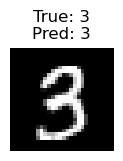

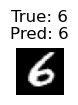

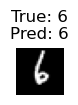

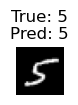

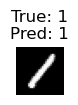

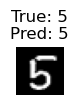

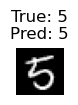

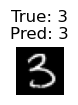

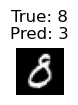

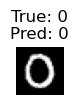

In [ ]:
n_images = 10
plt.figure(figsize=(12, 6))
for i in range(n_images):
  plt.subplot(2, n_images, i + 1)
  image = X_val[i].reshape(28, 28)

  _, _, _, _, _, A3_val = forward_propagation(X_val[i].reshape(1, -1))
  predicted_label = np.argmax(A3_val, axis = 1)[0]
  true_label = np.argmax(y_val[i])

  plt.imshow(image, cmap='')
  plt.axis('off')
  plt.title(f"True: {true_label}\nPred: {predicted_label}")

  plt.tight_layout()
  plt.?